In [14]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import cv2
import time
import urllib.request

In [15]:
def read_url_pic(x):
    image_url = x

    with urllib.request.urlopen(image_url) as url:
        s = url.read()

    arr = np.asarray(bytearray(s), dtype=np.uint8)
    image = cv2.imdecode(arr, -1)
    return image

def plot_url_pic(x):
    image_url = x

    with urllib.request.urlopen(image_url) as url:
        s = url.read()

    arr = np.asarray(bytearray(s), dtype=np.uint8)
    image = cv2.imdecode(arr, -1)

    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()

def img_to_arr(x):
    img = cv2.imread(x)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img,(64,64))
    return img

In [16]:
df = pd.read_csv("./data/english.csv")
df.head()

,image,label
0,Img/img001-001.png,0
1,Img/img001-002.png,0
2,Img/img001-003.png,0
3,Img/img001-004.png,0
4,Img/img001-005.png,0


In [17]:
df['image'] = "./data/" + df['image']
df.head()

,image,label
0,./data/Img/img001-001.png,0
1,./data/Img/img001-002.png,0
2,./data/Img/img001-003.png,0
3,./data/Img/img001-004.png,0
4,./data/Img/img001-005.png,0


(64, 64)


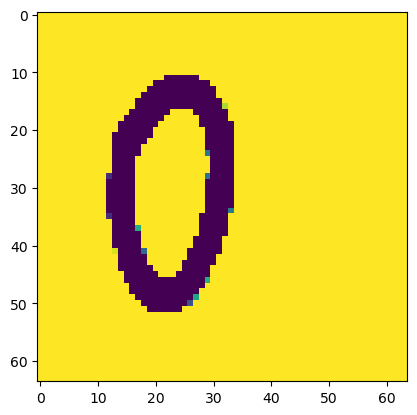

In [18]:
print(img_to_arr(df['image'][0]).shape)
plt.imshow(img_to_arr(df['image'][0]))

In [19]:
# start_time = time.time()
# image_array = []
# for i in df['image']:
#     image = img_to_arr(i)  # Read the image using cv2.imread()
#     if image is not None:
#         image_array.append(image)
# end_time = time.time()
# print("without multiprocessing:", end_time-start_time)

start_time = time.time()
import multiprocessing

with multiprocessing.Pool(4) as p:
    images = p.map(img_to_arr, df['image'])
end_time = time.time()
print("with multiprocessing:", end_time-start_time)

with multiprocessing: 46.970526933670044


In [20]:
x = np.array(images).reshape(3410, 64, 64,1)
x.shape

(3410, 64, 64, 1)

2


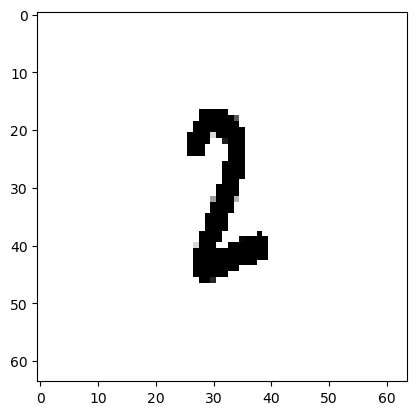

In [21]:
img = x[119].reshape((64,64))
plt.imshow(img,cmap='gray')
print(df['label'].iloc[119])

In [22]:
y = df['label']   
le = LabelEncoder()
y_label = le.fit_transform(y)

In [23]:
train_images,test_images,train_labels,test_labels = train_test_split(x,y_label,test_size=0.2,random_state=42)
train_images = train_images/255.0
test_images = test_images/255.0

In [24]:
model = Sequential()
model.add(Conv2D(512,(5,5),activation='relu',input_shape=(64,64,1)))
model.add(MaxPool2D(2,2))
model.add(Conv2D(256,(3,3),activation='relu',input_shape=(64,64,1)))
model.add(MaxPool2D(2,2))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(1024,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='sigmoid'))
model.add(Dense(62,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(train_images,train_labels,epochs=20,validation_data = (test_images,test_labels))

2023-08-03 14:20:10.195754: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Epoch 1/20
86/86 [==============================] - 174s 2s/step - loss: 4.1073 - accuracy: 0.0301 - val_loss: 3.7444 - val_accuracy: 0.0777
Epoch 2/20
86/86 [==============================] - 172s 2s/step - loss: 3.2483 - accuracy: 0.1492 - val_loss: 2.8946 - val_accuracy: 0.1950
Epoch 3/20
86/86 [==============================] - 172s 2s/step - loss: 2.5419 - accuracy: 0.2951 - val_loss: 2.3077 - val_accuracy: 0.3255
Epoch 4/20
86/86 [==============================] - 165s 2s/step - loss: 1.8994 - accuracy: 0.4556 - val_loss: 1.8418 - val_accuracy: 0.4648
Epoch 5/20
86/86 [==============================] - 270s 3s/step - loss: 1.3873 - accuracy: 0.6008 - val_loss: 1.5687 - val_accuracy: 0.5235
Epoch 6/20
86/86 [==============================] - 246s 3s/step - loss: 1.0046 - accuracy: 0.7192 - val_loss: 1.2837 - val_accuracy: 0.6290
Epoch 7/20
86/86 [==============================] - 282s 3s/step - loss: 0.7301 - accuracy: 0.7962 - val_loss: 1.1676 - val_accuracy: 0.6540
Epoch 8/20
86

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 60, 60, 512)       13312     
                                                                 
 max_pooling2d (MaxPooling2  (None, 30, 30, 512)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 256)       1179904   
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 256)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 256)       590080    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 6, 6, 256)         0

In [27]:
predicted_labels = le.inverse_transform(model.predict(test_images).argmax(axis=1))
actual_labels = le.inverse_transform(test_labels)

22/22 [==============================] - 12s 491ms/step


In [29]:
print('predicted label is ;',predicted_labels[6])
print('Actual Label is :',actual_labels[6])

predicted label is ; W
Actual Label is : W


printed label : n
actual label : n


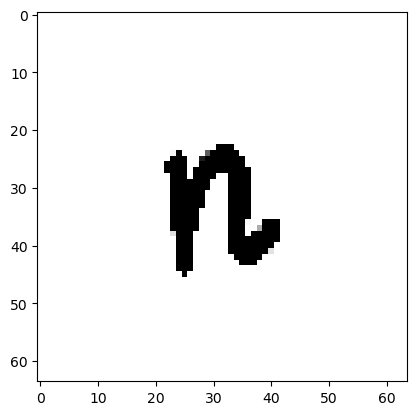

In [33]:
# number of image to be predicted
# change the value of I
i = 45

plt.imshow(test_images[i],cmap='gray')
print('printed label :',predicted_labels[i])
print('actual label :', actual_labels[i])

In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

y_pred = model.predict(test_images)
y_pred_labels = np.argmax(y_pred, axis=1)

# Calculate evaluation metrics
accuracy = accuracy_score(test_labels, y_pred_labels)
precision = precision_score(test_labels, y_pred_labels, average='weighted')
recall = recall_score(test_labels, y_pred_labels, average='weighted')
f1 = f1_score(test_labels, y_pred_labels, average='weighted')
confusion_mat = confusion_matrix(test_labels, y_pred_labels)

# Print or use the evaluation metrics as needed
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(confusion_mat)

22/22 [==============================] - 10s 462ms/step
Accuracy: 0.7595307917888563
Precision: 0.7794220035422381
Recall: 0.7595307917888563
F1 Score: 0.7592200132599969
Confusion Matrix:
[[ 6  0  0 ...  0  0  0]
 [ 0  4  0 ...  0  0  0]
 [ 0  0  9 ...  0  0  0]
 ...
 [ 0  0  1 ... 11  0  0]
 [ 0  0  0 ...  0  6  0]
 [ 0  0  0 ...  0  0  8]]


In [36]:
# export the model
# model.save('model.h5')
model.save('LetterRecognition.keras')